<a href="https://colab.research.google.com/github/AlirezaFB01/Machine-learning/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning


Unsupervised learning is a machine learning technique that groups data points together without the use of labeled data. Clustering is a type of unsupervised learning that uses algorithms to group data into clusters based on similarities.

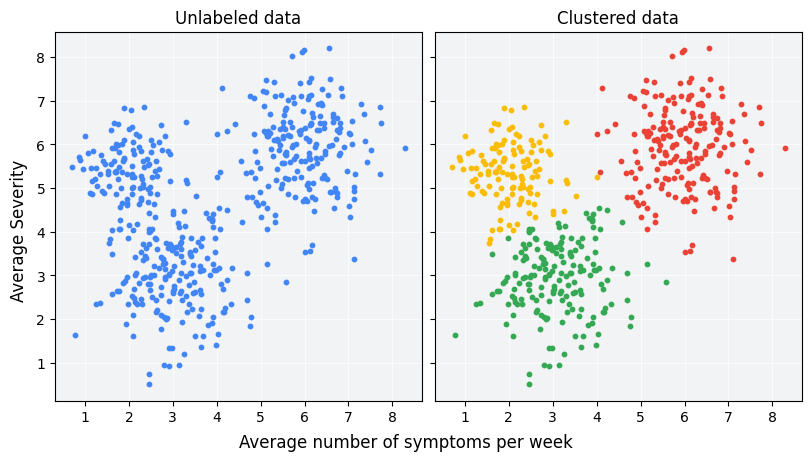

Clustering is the process of arranging a group of objects in such a manner that the objects in the same group (which is referred to as a cluster) are more similar to each other than to the objects in any other group.  Data professionals often use clustering in the Exploratory Data Analysis phase to discover new information and patterns in the data. As clustering is unsupervised machine learning, it doesn’t require a labeled dataset.

Clustering itself is not one specific algorithm but the general task to be solved. You can achieve this goal using various algorithms that differ significantly in their understanding of what constitutes a cluster and how to find them efficiently.

# KMeans


K-means clustering is a simple and popular type of unsupervised machine learning algorithm, which is used on unlabeled data. The goal of this algorithm is toﬁnd groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups according to provided features similarity.The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum of squared criterion:

$$
\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_j - \mu_i||^2)
$$

# How the algorithm works

The Κ-means clustering algorithm uses iterative refinement to produce a final result. The algorithm inputs are the number of clusters $k$ and the data set. The data set is a collection of features for each data point. The algorithms starts with initial estimates for the $k$ centroids, which can either be randomly generated or randomly selected from the data set. The algorithm then iterates between two steps:

**Data assigment step:**
Each centroid defines one of the clusters. In this step, each data point is assigned to its nearest centroid, based on the squared Euclidean distance. More formally, if $c_i$ is the collection of centroids in set $C$, then each data point $x$ is assigned to a cluster based on:

\\
$$
\arg \min_{c_i \in C}\:dist{(c_i,x)}^2
$$

\\
where dist( · ) is the standard ($L_2$) Euclidean distance. Let the set of data point assignments for each ith cluster centroid be $S_i$.

\\
**Centroid update step:** In this step, the centroids are recomputed. This is done by taking the mean of all data points assigned to that centroid's cluster.

$$
c_i=\frac{1}{|S_i|}\sum_{x \in S_i}x
$$
\
The algorithm iterates between steps one and two until a stopping criteria is met (i.e., no data points change clusters, the sum of the distances is minimized, or some maximum number of iterations is reached).

\\
**Convergence and random initialization:**
This algorithm is guaranteed to converge to a result. The result may be a local optimum (i.e. not necessarily the best possible outcome), meaning that assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.

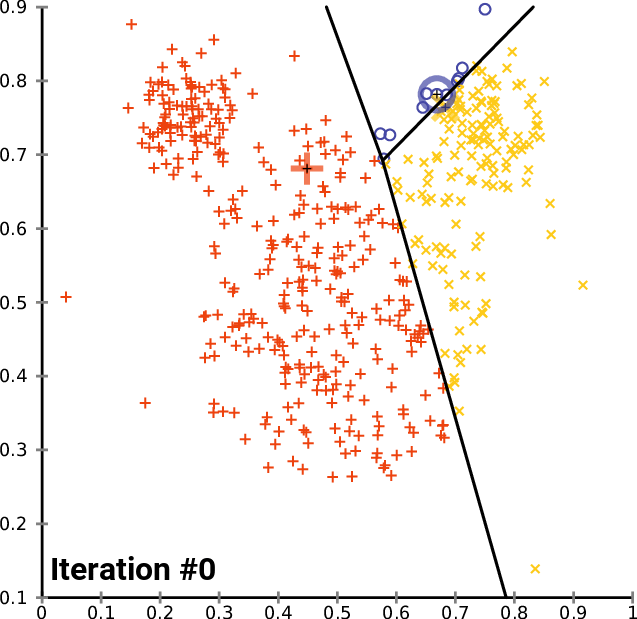

# KMeans Implement

### Importing the libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import preprocessing  # اضافه کردن preprocessing

# تقسیم داده‌ها
X_train, X_test, y_train, y_test = train_test_split(
    home_data[['latitude', 'longitude']],
    home_data[['median_house_value']],
    test_size=0.33,
    random_state=0
)

# نرمال‌سازی داده‌ها
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

print(X_train_norm[:5])  # نمایش 5 ردیف اول داده‌های نرمال شده


[[ 0.31522478 -0.94901704]
 [ 0.30912951 -0.95101995]
 [ 0.31449554 -0.94925895]
 [ 0.2649654  -0.96425792]
 [ 0.31827649 -0.94799793]]


### Loading the Data

In [25]:
import pandas as pd
import numpy as np

# ایجاد داده‌های تصادفی
data = {
    'longitude': np.random.uniform(-125, -115, 1000),  # طول جغرافیایی بین -125 تا -115
    'latitude': np.random.uniform(32, 42, 1000),      # عرض جغرافیایی بین 32 تا 42
    'median_house_value': np.random.uniform(100000, 500000, 1000)  # قیمت خانه بین 100,000 تا 500,000
}

# ساخت دیتافریم و نمایش آن
home_data = pd.DataFrame(data)
print(home_data.head())


    longitude   latitude  median_house_value
0 -122.637061  39.153762       440763.047919
1 -120.379547  34.587746       428814.246864
2 -117.101114  35.623004       244940.150287
3 -116.884440  38.274314       252007.407770
4 -119.534982  32.291274       318292.556447


The data include 3 variables that we have selected using the usecols parameter:

*   **longitude:** A value representing how far west a house is. Higher values represent houses that are further West.
*   **latitude:** A value representing how far north a house is. Higher values represent houses that are further north.
*   **median_house_value:** The median house price within a block measured in USD.

### Visualize the Data

We start by visualizing our housing data. We look at the location data with a heatmap based on the median price in a block. We will use Seaborn to quickly create plots in this tutorial

<Axes: xlabel='longitude', ylabel='latitude'>

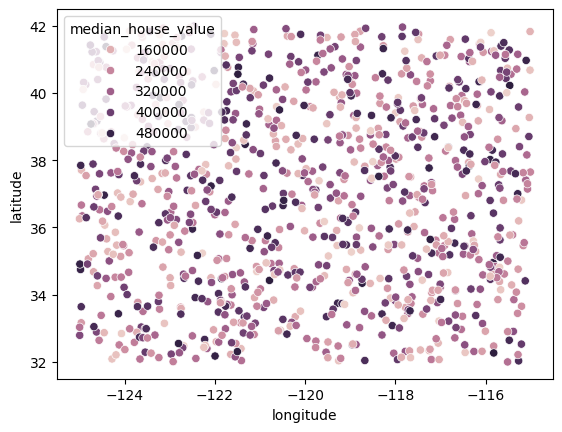

In [26]:
sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')

We see that most of the expensive houses are on the west coast of California with different areas that have clusters of moderately priced houses. This is expected as typically waterfront properties are worth more than houses that are not on the coast.

### Normalizing the Data

When working with distance-based algorithms, like k-Means Clustering, we must normalize the data. If we do not normalize the data, variables with different scaling will be weighted differently in the distance formula that is being optimized during training. For example, if we were to include price in the cluster, in addition to latitude and longitude, price would have an outsized impact on the optimizations because its scale is significantly larger and wider than the bounded location variables.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

### Fitting and Evaluating the Model

For the first iteration, we will arbitrarily choose a number of clusters (referred to as k) of 3. Building and fitting models in sklearn is very simple. We will create an instance of KMeans, define the number of clusters using the `n_clusters` attribute, set `n_init`, which defines the number of iterations the algorithm will run with different centroid seeds, to “auto”, and we will set the `random_state` to 0 so we get the same result each time we run the code.  We can then fit the model to the normalized training data using the `fit()` method.

In [28]:
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

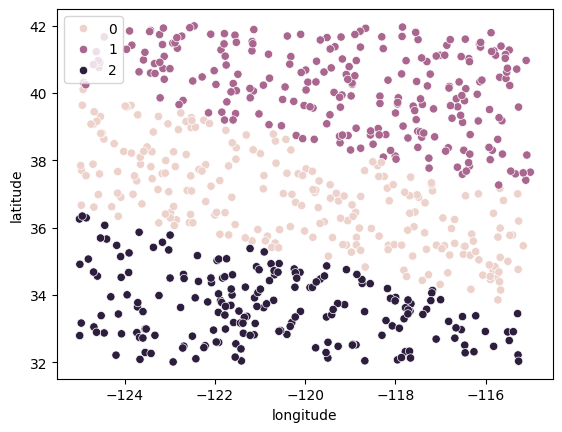

In [29]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

### Ploting The Results

We see that the data are now clearly split into 3 distinct groups (Northern California, Central California, and Southern California). We can also look at the distribution of median house prices in these 3 groups using a boxplot.

<Axes: ylabel='median_house_value'>

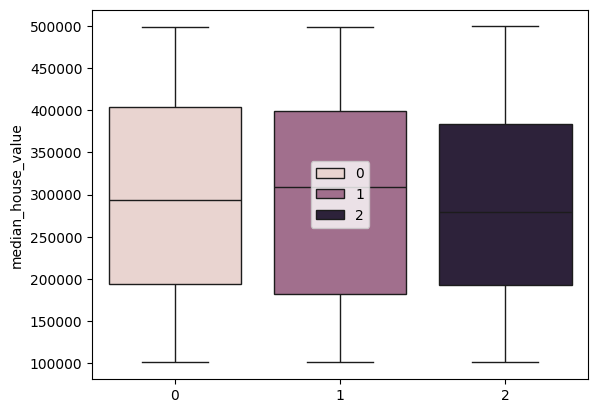

In [30]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'], hue=kmeans.labels_)

We clearly see that the Northern and Southern clusters have similar distributions of median house values (clusters 0 and 2) that are higher than the prices in the central cluster (cluster 1).

Since we have not looked at the strength of different numbers of clusters, we do not know how good of a fit the k = 3 model is. In the next section, we will explore different clusters and compare performance to make a decision on the best hyperparameter values for our model.

### Choosing the best number of clusters

The weakness of k-means clustering is that we don’t know how many clusters we need by just running the model. We need to test ranges of values and make a decision on the best value of k. We typically make a decision using the Elbow method to determine the optimal number of clusters where we are both not overfitting the data with too many clusters, and also not underfitting with too few.

<Axes: xlabel='longitude', ylabel='latitude'>

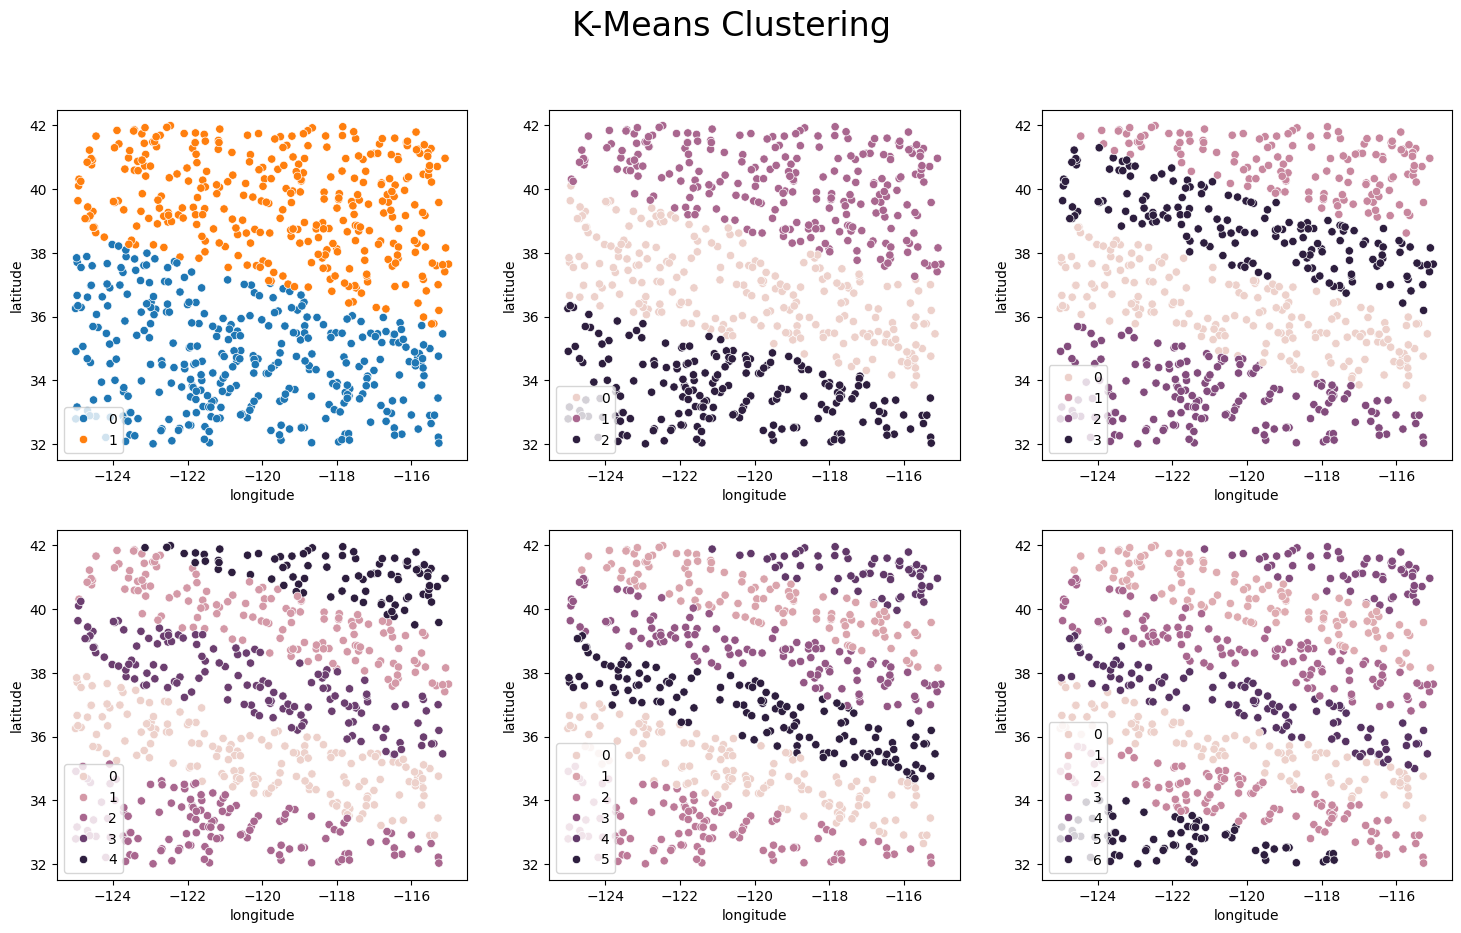

In [31]:
K = range(2, 8)
fits = []

for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)

    # append the model to fits
    fits.append(model)

f, axes = plt.subplots(2, 3, figsize=(18, 10))
f.suptitle('K-Means Clustering', fontsize=24)
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[0].labels_, ax=axes[0,0])
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[1].labels_, ax=axes[0,1])
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_, ax=axes[0,2])
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[3].labels_, ax=axes[1,0])
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[4].labels_, ax=axes[1,1])
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[5].labels_, ax=axes[1,2])

To determine the optimal number of clusters, we have to select the value of k at the “Elbow”. In the next two section, we have explained in detail about the elbow. Thus for the given data, we conclude that the optimal number of clusters for the data is 5. We see `k = 5` is probably the best we can do without `overfitting`.

In [32]:
kmeans = KMeans(n_clusters = 5, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=5, random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

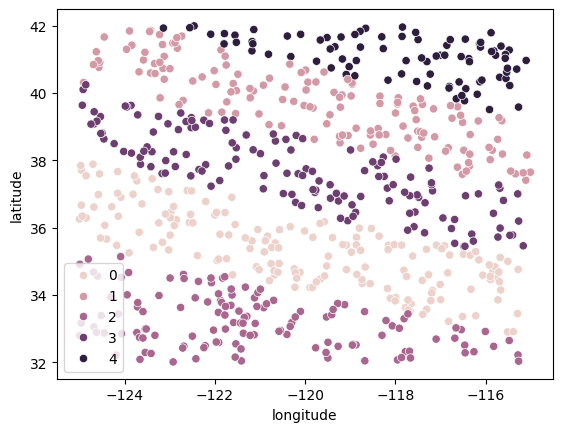

In [33]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

<Axes: ylabel='median_house_value'>

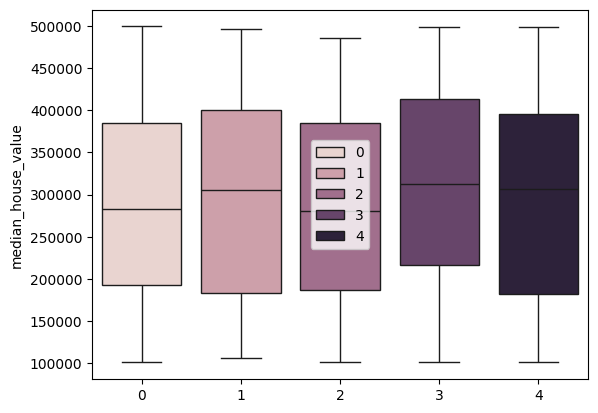

In [34]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'], hue=kmeans.labels_)

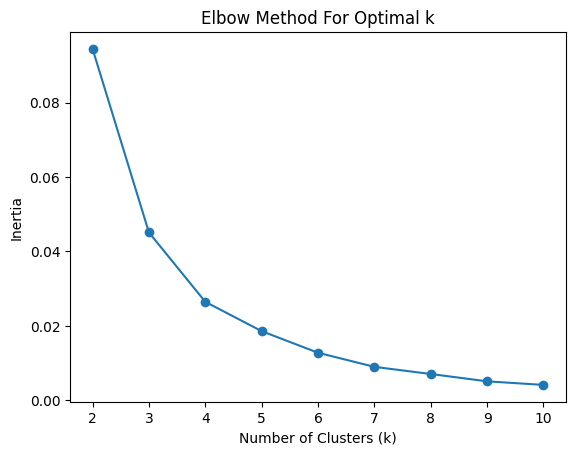

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

# تعریف محدوده k که می‌خواهید آزمایش کنید
K = range(2, 11)  # از 2 تا 10 خوشه

# لیستی برای ذخیره inertia
inertia = []

# محاسبه inertia برای هر k
for k in K:
    model = KMeans(n_clusters=k, random_state=0, n_init='auto')
    model.fit(X_train_norm)
    inertia.append(model.inertia_)

# رسم نمودار inertia در برابر تعداد خوشه‌ها (k)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


## **Image Compression**

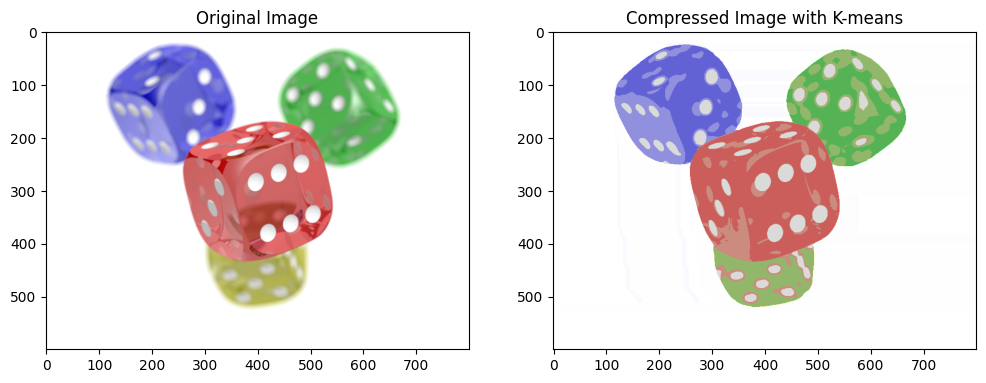

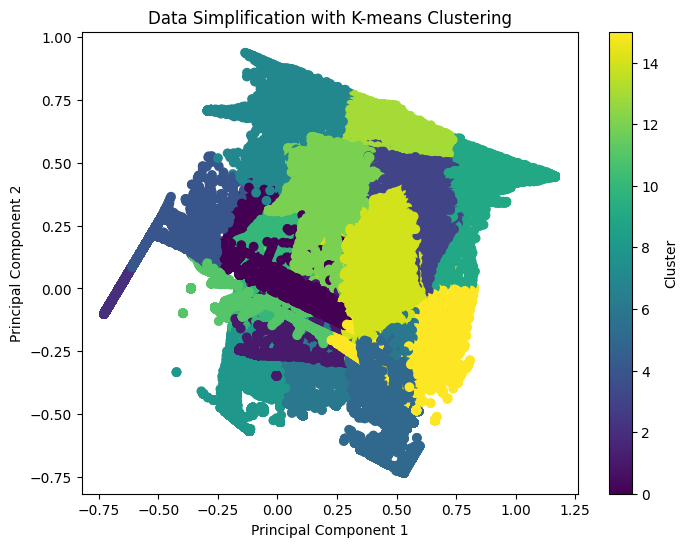

In [36]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from sklearn.decomposition import PCA

# Load an example image
image = io.imread('https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png')
image = np.array(image, dtype=np.float64) / 255  # Normalize

# Reshape the image to be a long list of RGB values
w, h, d = image.shape
image_array = np.reshape(image, (w * h, d))

# Perform K-means clustering on the RGB values
kmeans = KMeans(n_clusters=16, random_state=0)
clusters = kmeans.fit_predict(image_array)

# Recreate the compressed image using the cluster centers (colors)
image_compressed = kmeans.cluster_centers_[clusters].reshape(w, h, d)

# Display original and compressed images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')

ax[1].imshow(image_compressed)
ax[1].set_title('Compressed Image with K-means')
plt.show()

# Apply K-means clustering with PCA for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(image_array)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
plt.title('Data Simplification with K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
